In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap
from utils.helper_functions import calculate_cbtmin, calculate_sleep_onset, calculate_sleep_duration

In [2]:
figsize = (8, 4)
title_fontsize = 20
tick_label_fontsize = 14
legend_fontsize = 14
axis_label_fontsize = 16
text_fontsize = 18

# Circadian state on CP days

In [3]:
light_condition = "early_light"
simulation_data_path = "data/chang14_selected_light_sensitivity_parameters"
reference_simulation_data_path = "data/chang14_reference_parameters"
selected_parameters = pd.read_csv('data/light_sensitivity_parameter_exploration/early_light_selected_light_sensitivity_parameters.csv')

## Sanity check that we're picking the right days

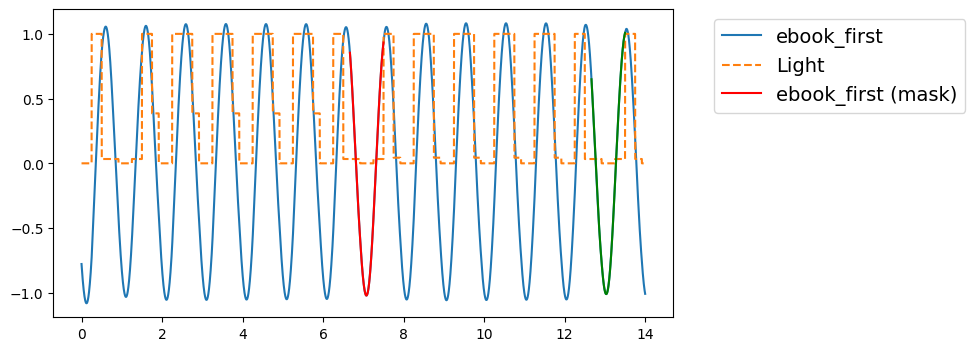

In [5]:
first_week_mask_start = 6.0 + 16.0 / 24.0 # 16 hrs on day 6
first_week_mask_end = 7.0 + 12.0 / 24.0 # 12 hrs on day 7
second_week_mask_start = 12.0 + 16.0 / 24.0 # 16 hrs on day 12
second_week_mask_end = 13.0 + 12.0 / 24.0 # 12 hrs on day 13

for idx in selected_parameters.index:
    for ebook_order in ['ebook_first', 'ebook_second']:
        for baseline_condition in ['', 'high_']:
            data = np.load(f"{simulation_data_path}/{light_condition}/{light_condition}_chang14_simulation_{idx}.npz", 
                            allow_pickle=True)
            # Ebook first
            time = data['time'] / 24.0
            trajectory_states = data[f'chang14_{baseline_condition}{ebook_order}_trajectory_states']
            light = data[f'chang14_{baseline_condition}{ebook_order}_light']

            circadian_state = trajectory_states[:, 0]

            # time mask
            first_week_mask = (time >= first_week_mask_start) & (time <= first_week_mask_end)
            second_week_mask = (time >= second_week_mask_start) & (time <= second_week_mask_end)

            plt.figure(figsize=figsize)
            plt.plot(time, circadian_state, label=f"{baseline_condition}{ebook_order}")
            plt.plot(time, light/np.max(light), label="Light", linestyle='--')
            plt.plot(time[first_week_mask], circadian_state[first_week_mask], 'r', 
                     label=f"{baseline_condition}{ebook_order} (mask)")
            plt.plot(time[second_week_mask], circadian_state[second_week_mask], 'g')


            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=legend_fontsize)
            plt.show()
            break
        break
    break



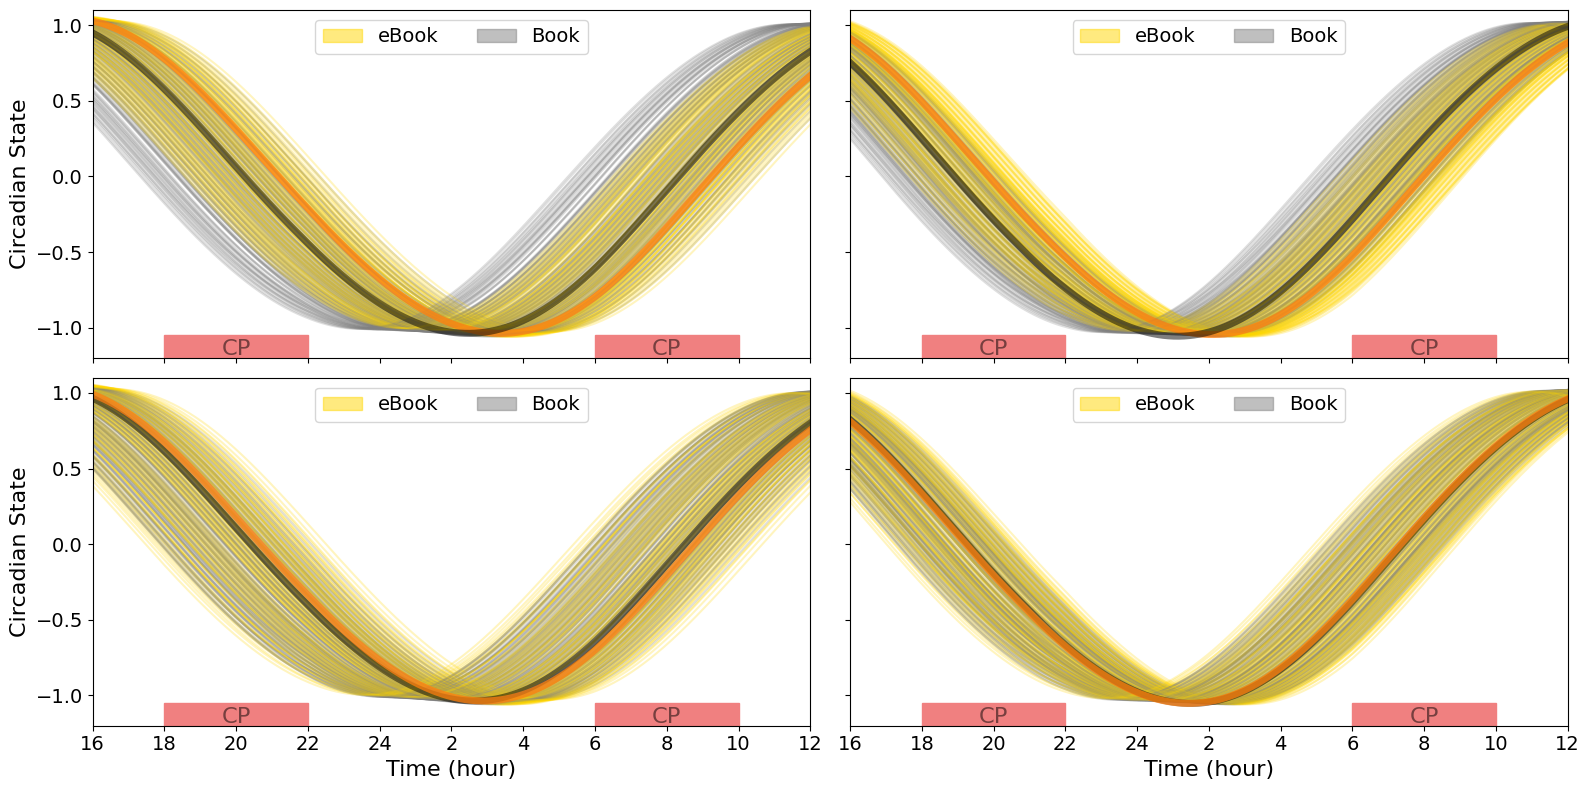

In [4]:
first_week_mask_start = 6.0 + 16.0 / 24.0 # 16 hrs on day 6
first_week_mask_end = 7.0 + 12.0 / 24.0 # 12 hrs on day 7
second_week_mask_start = 12.0 + 16.0 / 24.0 # 16 hrs on day 12
second_week_mask_end = 13.0 + 12.0 / 24.0 # 12 hrs on day 13

fig, axs = plt.subplots(2, 2, figsize=(figsize[0] * 2, figsize[1] * 2), sharex=True, sharey=True)

# top left is ebook_first without high light
# top right is ebook_first with high light
# bottom left is ebook_second without high light
# bottom right is ebook_second with high light

for kdx in range(len(selected_parameters.index)):
    sim_idx = selected_parameters.index[kdx]
    for idx, ebook_order in enumerate(['ebook_first', 'ebook_second']):
        for jdx, baseline_condition in enumerate(['', 'high_']):
            data = np.load(f"{simulation_data_path}/{light_condition}/{light_condition}_chang14_simulation_{sim_idx}.npz", 
                            allow_pickle=True)
            # Ebook first
            time = data['time'] / 24.0
            trajectory_states = data[f'chang14_{baseline_condition}{ebook_order}_trajectory_states']
            # light = data[f'chang14_{baseline_condition}{ebook_order}_light']

            circadian_state = trajectory_states[:, 0]

            # time mask
            first_week_mask = (time >= first_week_mask_start) & (time <= first_week_mask_end)
            second_week_mask = (time >= second_week_mask_start) & (time <= second_week_mask_end)

            if ebook_order == 'ebook_first':
                first_condition = 'eBook'
                second_condition = 'Book'
                color_values = ['gold', 'gray']
            else:
                first_condition = 'Book'
                second_condition = 'eBook'
                color_values = ['gray', 'gold']

            axs[idx, jdx].plot((time[first_week_mask] - first_week_mask_end + 1) * 24, 
                              circadian_state[first_week_mask],
                              color=color_values[0], alpha=0.25,
                              label=first_condition, zorder=0)

            axs[idx, jdx].plot((time[second_week_mask] - second_week_mask_end + 1) * 24,
                              circadian_state[second_week_mask],
                              color=color_values[1], alpha=0.25,
                              label=second_condition, zorder=0)

# Add result with reference parameters
data = np.load(f"{reference_simulation_data_path}/chang14_simulation_reference_parameters.npz", allow_pickle=True)
time = data['time'] / 24.0
for idx, ebook_order in enumerate(['ebook_first', 'ebook_second']):
    for jdx, baseline_condition in enumerate(['', 'high_']):
        # Load reference simulation data
        trajectory_states = data[f'chang14_{baseline_condition}{ebook_order}_trajectory_states']
        circadian_state = trajectory_states[:, 0]

        # time mask
        first_week_mask = (time >= first_week_mask_start) & (time <= first_week_mask_end)
        second_week_mask = (time >= second_week_mask_start) & (time <= second_week_mask_end)

        if ebook_order == 'ebook_first':
            first_condition = 'eBook'
            second_condition = 'Book'
            color_values = ['tab:orange', 'black']
            alpha_values = [0.75, 0.5]
        else:
            first_condition = 'Book'
            second_condition = 'eBook'
            color_values = ['black', 'tab:orange']
            alpha_values = [0.5, 0.75]

        axs[idx, jdx].plot((time[first_week_mask] - first_week_mask_end + 1) * 24, 
                    circadian_state[first_week_mask], 
                    color=color_values[0], alpha=alpha_values[0], label='Reference parameters eBook',
                    linewidth=5, zorder=1)
        
        axs[idx, jdx].plot((time[second_week_mask] - second_week_mask_end + 1) * 24,
                    circadian_state[second_week_mask], 
                    color=color_values[1], alpha=alpha_values[1], label='Reference parameters Book',
                    linewidth=5, zorder=1)


axs[0, 0].set_ylabel("Circadian State", fontsize=axis_label_fontsize)
axs[1, 0].set_ylabel("Circadian State", fontsize=axis_label_fontsize)
axs[1, 0].set_xlabel("Time (hour)", fontsize=axis_label_fontsize)
axs[1, 1].set_xlabel("Time (hour)", fontsize=axis_label_fontsize)

# Constant procedures as rectangles
for idx in range(2):
    for jdx in range(2):
        rect_width = 4
        rect_height = 0.15
        rect1 = patches.Rectangle((6, -1.2), rect_width, rect_height, linewidth=1, edgecolor='lightcoral', facecolor='lightcoral')
        rect2 = patches.Rectangle((18, -1.2), rect_width, rect_height, linewidth=1, edgecolor='lightcoral', facecolor='lightcoral')
        axs[idx, jdx].add_patch(rect1)
        axs[idx, jdx].add_patch(rect2)
        text_location1 = (6 + rect_width / 2, -1.215 + rect_height / 2)
        text_location2 = (18 + rect_width / 2, -1.215 + rect_height / 2)
        axs[idx, jdx].text(*text_location1, 'CP', fontsize=text_fontsize * 0.9, ha='center', va='center', alpha=0.5)
        axs[idx, jdx].text(*text_location2, 'CP', fontsize=text_fontsize * 0.9, ha='center', va='center', alpha=0.5)

# Create legend with patches
legend_elements = [patches.Patch(facecolor='gold', edgecolor='gold', label='eBook', alpha=0.5),
                   patches.Patch(facecolor='gray', edgecolor='gray', label='Book', alpha=0.5)]
axs[0, 1].legend(handles=legend_elements, loc='best', fontsize=legend_fontsize, ncols=2)
axs[0, 0].legend(handles=legend_elements, loc='best', fontsize=legend_fontsize, ncols=2)
axs[1, 0].legend(handles=legend_elements, loc='best', fontsize=legend_fontsize, ncols=2)
axs[1, 1].legend(handles=legend_elements, loc='best', fontsize=legend_fontsize, ncols=2)


axs[0, 0].set_xticks(np.linspace(4, 24, 11))
axs[0, 0].set_xticklabels([
    '16', '18', '20', '22', '24', '2', '4', '6', '8', '10', '12'
], fontsize=tick_label_fontsize)
axs[0, 0].set_xlim([4, 24])
axs[0, 0].set_ylim([-1.2, 1.1])

axs[0, 0].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)
axs[1, 0].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)
axs[1, 1].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

plt.savefig(f"figures/circadian_states_{light_condition}.pdf", bbox_inches='tight')
plt.savefig(f"figures/circadian_states_{light_condition}.png", bbox_inches='tight', dpi=300)

plt.tight_layout()
plt.show()

# Phase shift

In [6]:
light_condition = "early_light"
figsize_scaling = 0.85
selected_parameters = pd.read_csv(f'data/light_sensitivity_parameter_exploration/{light_condition}_selected_light_sensitivity_parameters.csv', index_col=0)
simulation_features = pd.read_csv("data/chang14_selected_light_sensitivity_parameters/selected_light_sensitivity_parameters_simulation_features.csv", index_col=0)

In [7]:
def get_shift_data(simulation_features, baseline_condition, light_condition, ebook_order):
    book_day = 12 if ebook_order == 'ebook_first' else 6
    ebook_day = 6 if ebook_order == 'ebook_first' else 12
    book_cbtmin = simulation_features[(simulation_features['day'] == book_day) & (simulation_features['daily_condition'] == 'Book') &
                                        (simulation_features['simulation_condition'] == f'chang14_{baseline_condition}{ebook_order}') &
                                        (simulation_features['light_condition'] == light_condition)]
    ebook_cbtmin = simulation_features[(simulation_features['day'] == ebook_day) & (simulation_features['daily_condition'] == 'eBook') &
                                        (simulation_features['simulation_condition'] == f'chang14_{baseline_condition}{ebook_order}') &
                                        (simulation_features['light_condition'] == light_condition)]
    shift = pd.DataFrame()
    shift['diff'] = ebook_cbtmin['cbtmin'] - book_cbtmin['cbtmin']
    shift['simulation_condition'] = ebook_cbtmin['simulation_condition']
    shift['light_condition'] = light_condition
    shift['p'] = selected_parameters['p'].values
    shift['k'] = selected_parameters['k'].values
    shift['tauc'] = selected_parameters['tauc'].values

    return shift

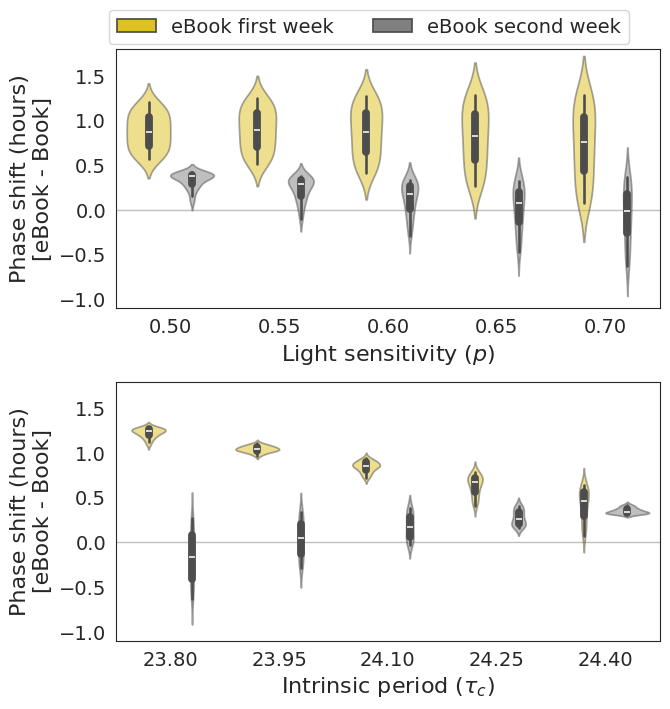

In [8]:
baseline_condition = '' # ['high_', '']
shift_first = get_shift_data(simulation_features, baseline_condition, light_condition, 'ebook_first')
shift_second = get_shift_data(simulation_features, baseline_condition, light_condition, 'ebook_second')
df = pd.concat([shift_first, shift_second])

sns.set_style('white')

palette = {
    'chang14_ebook_first': 'gold',
    'chang14_ebook_second': 'gray'
}

fig, ax = plt.subplots(2, 1, figsize=(figsize_scaling * figsize[0], figsize_scaling * figsize[1]*2), sharey=True)
sns.violinplot(x='p', y='diff', hue='simulation_condition', data=df, ax=ax[0], palette=palette,)
sns.violinplot(x='tauc', y='diff', hue='simulation_condition', data=df, ax=ax[1], legend=False,
               palette=palette)

for ax_i in ax:
    for violin  in ax_i.collections[::]:
        violin.set_alpha(0.5)

# adjust legend position
handles, labels = ax[0].get_legend_handles_labels()
labels = ['eBook first week', 'eBook second week']
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.55, 1.05), loc='upper center', fontsize=legend_fontsize)

ax[0].get_legend().remove()
ax[0].set_xticks(range(len(df['p'].unique())))
ax[0].set_xticklabels([f'{p:.2f}' for p in df['p'].unique()], fontsize=tick_label_fontsize)
ax[1].set_xticks(range(len(df['tauc'].unique())))
ax[1].set_xticklabels([f'{p:.2f}' for p in df['tauc'].unique()], fontsize=tick_label_fontsize)

ax[0].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)
ax[1].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

ax[0].set_ylabel('Phase shift (hours)\n[eBook - Book]', fontsize=axis_label_fontsize)
ax[1].set_ylabel('Phase shift (hours)\n[eBook - Book]', fontsize=axis_label_fontsize)
ax[0].set_xlabel(r'Light sensitivity ($p$)', fontsize=axis_label_fontsize)
ax[1].set_xlabel(r'Intrinsic period ($\tau_{c}$)', fontsize=axis_label_fontsize)

ax[0].set_ylim(-1.1, 1.8)
ax[1].set_ylim(-1.1, 1.8)

ax[0].axhline(0, color='black', linewidth=1, linestyle='-', zorder=0, alpha=0.25)
ax[1].axhline(0, color='black', linewidth=1, linestyle='-', zorder=0, alpha=0.25)

plt.tight_layout()

baseline_condition_name = 'low_baseline' if baseline_condition == '' else 'high_baseline'
plt.savefig(f"figures/phase_shift_{baseline_condition_name}.pdf", bbox_inches='tight')
plt.savefig(f"figures/phase_shift_{baseline_condition_name}.png", bbox_inches='tight', dpi=300)

plt.show()

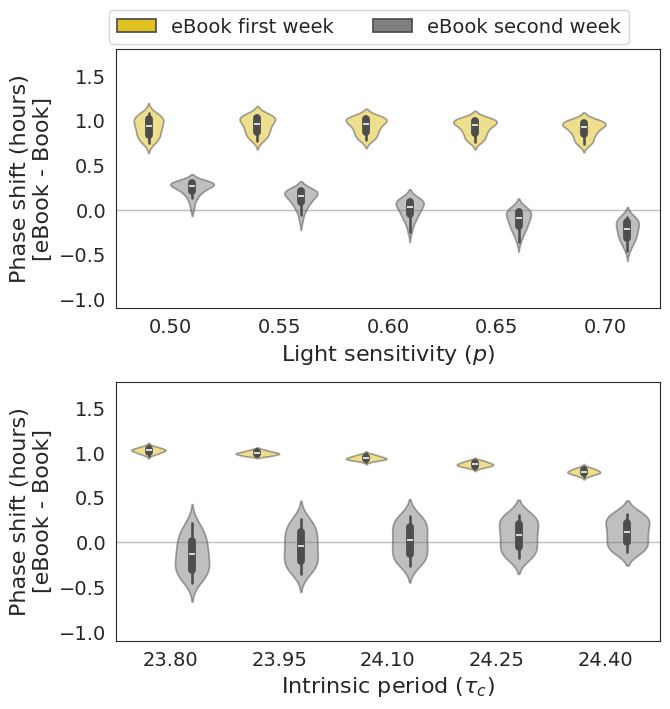

In [9]:

baseline_condition = 'high_' # ['high_', '']
shift_first = get_shift_data(simulation_features, baseline_condition, light_condition, 'ebook_first')
shift_second = get_shift_data(simulation_features, baseline_condition, light_condition, 'ebook_second')
df = pd.concat([shift_first, shift_second])

sns.set_style('white')

palette = {
    f'chang14_{baseline_condition}ebook_first': 'gold',
    f'chang14_{baseline_condition}ebook_second': 'gray'
}


fig, ax = plt.subplots(2, 1, figsize=(figsize_scaling * figsize[0], figsize_scaling * figsize[1]*2), sharey=True)
sns.violinplot(x='p', y='diff', hue='simulation_condition', data=df, ax=ax[0], palette=palette,)
sns.violinplot(x='tauc', y='diff', hue='simulation_condition', data=df, ax=ax[1], legend=False,
               palette=palette)

for ax_i in ax:
    for violin  in ax_i.collections[::]:
        violin.set_alpha(0.5)

# adjust legend position
handles, labels = ax[0].get_legend_handles_labels()
labels = ['eBook first week', 'eBook second week']
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.55, 1.05), loc='upper center', fontsize=legend_fontsize)

ax[0].get_legend().remove()
ax[0].set_xticks(range(len(df['p'].unique())))
ax[0].set_xticklabels([f'{p:.2f}' for p in df['p'].unique()], fontsize=tick_label_fontsize)
ax[1].set_xticks(range(len(df['tauc'].unique())))
ax[1].set_xticklabels([f'{p:.2f}' for p in df['tauc'].unique()], fontsize=tick_label_fontsize)

ax[0].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)
ax[1].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

ax[0].set_ylabel('Phase shift (hours)\n[eBook - Book]', fontsize=axis_label_fontsize)
ax[1].set_ylabel('Phase shift (hours)\n[eBook - Book]', fontsize=axis_label_fontsize)
ax[0].set_xlabel(r'Light sensitivity ($p$)', fontsize=axis_label_fontsize)
ax[1].set_xlabel(r'Intrinsic period ($\tau_{c}$)', fontsize=axis_label_fontsize)

ax[0].set_ylim(-1.1, 1.8)
ax[1].set_ylim(-1.1, 1.8)

ax[0].axhline(0, color='black', linewidth=1, linestyle='-', zorder=0, alpha=0.25)
ax[1].axhline(0, color='black', linewidth=1, linestyle='-', zorder=0, alpha=0.25)

plt.tight_layout()

baseline_condition_name = 'low_baseline' if baseline_condition == '' else 'high_baseline'
plt.savefig(f"figures/phase_shift_{baseline_condition_name}.pdf", bbox_inches='tight')
plt.savefig(f"figures/phase_shift_{baseline_condition_name}.png", bbox_inches='tight', dpi=300)

plt.show()

# Effect of initial conditions on phase shift

In [15]:
figsize_scaling = 0.875
lights_on_start_times = [5, 6, 7, 8, 9]
data_path = 'data/different_initial_conditions'

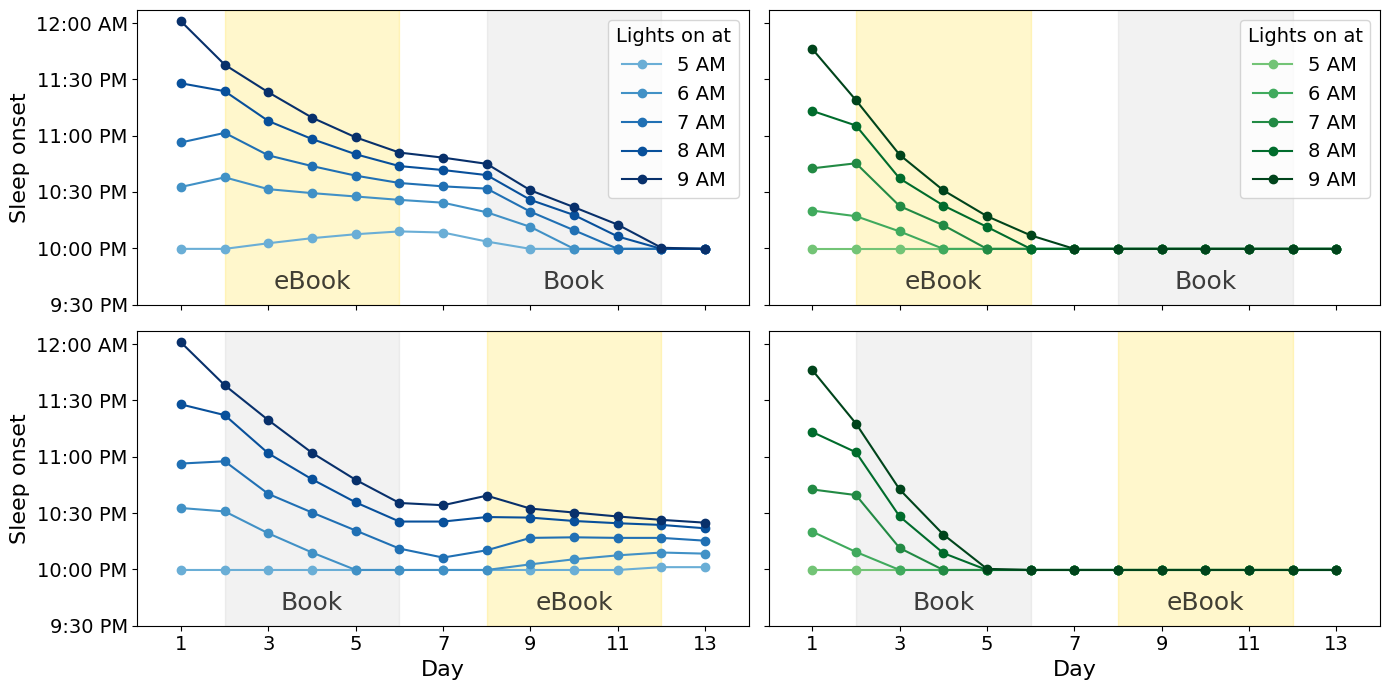

In [16]:
colors_low = plt.get_cmap('Blues')(np.linspace(0.5, 1, len(lights_on_start_times)))
colors_high = plt.get_cmap('Greens')(np.linspace(0.5, 1, len(lights_on_start_times)))

low_baseline_conditions = [
    'chang14_ebook_first', 'chang14_ebook_second',
]
high_baseline_conditions = [
    'chang14_high_ebook_first', 'chang14_high_ebook_second',
]

fig, axs = plt.subplots(2, 2, figsize=(figsize_scaling * figsize[0] * 2, figsize_scaling * figsize[1] * 2), 
                        sharey=True, sharex=True)

for idx, lights_on in enumerate(lights_on_start_times):
    data = np.load(f"{data_path}/different_initial_conditions_{lights_on}_lights_on.npz")
    time = data['time']

    # Calculate sleep onset time
    for jdx, condition in enumerate(low_baseline_conditions):
        sleep_onset = calculate_sleep_onset(time, data, condition)
        days = np.arange(1, len(sleep_onset) + 1)
        normalized_sleep_onset = sleep_onset - days * 24 + 24
        axs[jdx, 0].plot(days, normalized_sleep_onset,
                    marker='o', color=colors_low[idx],
                    label=f'{lights_on} AM',)
        axs[jdx, 0].set_xlim(0, 14)

    for jdx, condition in enumerate(high_baseline_conditions):
        sleep_onset = calculate_sleep_onset(time, data, condition)
        days = np.arange(1, len(sleep_onset) + 1)
        normalized_sleep_onset = sleep_onset - days * 24 + 24
        axs[jdx, 1].plot(days, normalized_sleep_onset,
                    marker='o', color=colors_high[idx],
                    label=f'{lights_on} AM',)
        axs[jdx, 1].set_xlim(0, 14)

for i in range(2):
    axs[0, i].axvspan(2, 6, color='gold', alpha=0.2) # eBook
    axs[0, i].axvspan(8, 12, color='gray', alpha=0.1) # Book
    axs[1, i].axvspan(2, 6, color='gray', alpha=0.1)
    axs[1, i].axvspan(8, 12, color='gold', alpha=0.2)

axs[0, 0].set_xlim(0, 14)
axs[1, 1].set_xlim(0, 14)

axs[0, 0].legend(fontsize=legend_fontsize, title='Lights on at', title_fontsize=legend_fontsize)
axs[0, 1].legend(fontsize=legend_fontsize, title='Lights on at', title_fontsize=legend_fontsize)

axs[1, 0].set_xlabel('Day', fontsize=axis_label_fontsize)
axs[1, 1].set_xlabel('Day', fontsize=axis_label_fontsize)
axs[1, 0].set_xticks(days[::2])

axs[0, 0].set_yticks([21.5, 22, 22.5, 23, 23.5, 24])
axs[0, 0].set_yticklabels(['9:30 PM', '10:00 PM', '10:30 PM', '11:00 PM', '11:30 PM', '12:00 AM'],
                        fontsize=tick_label_fontsize)
axs[1, 0].set_yticks([21.5, 22, 22.5, 23, 23.5, 24])
axs[1, 0].set_yticklabels(['9:30 PM', '10:00 PM', '10:30 PM', '11:00 PM', '11:30 PM', '12:00 AM'],
                        fontsize=tick_label_fontsize)

axs[0, 0].set_ylabel('Sleep onset', fontsize=axis_label_fontsize)
axs[1, 0].set_ylabel('Sleep onset', fontsize=axis_label_fontsize)

axs[1, 0].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)
axs[1, 1].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

for i in range(2):
    axs[0, i].text(4, 21.7, 'eBook', horizontalalignment='center', verticalalignment='center',
                fontsize=text_fontsize, color='black', alpha=0.75)
    axs[0, i].text(10, 21.7, 'Book', horizontalalignment='center', verticalalignment='center',
                fontsize=text_fontsize, color='black', alpha=0.75)
    axs[1, i].text(4, 21.7, 'Book', horizontalalignment='center', verticalalignment='center',
                fontsize=text_fontsize, color='black', alpha=0.75)
    axs[1, i].text(10, 21.7, 'eBook', horizontalalignment='center', verticalalignment='center',
                fontsize=text_fontsize, color='black', alpha=0.75)
plt.tight_layout()
plt.savefig(f"figures/fig_2_sleep_onset_evolution.pdf", bbox_inches='tight')
plt.savefig(f"figures/fig_2_sleep_onset_evolution.png", bbox_inches='tight', dpi=300)
plt.show()